In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [5]:
# HeartDisease - target

In [6]:
y = df["HeartDisease"]

In [7]:
y.shape

(319795,)

In [8]:
# Категориальные признаки сделаем через OHE 

In [9]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [10]:
df["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
 df["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [13]:
df["SleepTime"].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

In [14]:
df.BMI.mean(), df.BMI.min(), df.BMI.max()

(28.325398520926328, 12.02, 94.85)

In [15]:
df.BMI.unique().shape

(3604,)

In [16]:
df.PhysicalHealth.mean(), df.PhysicalHealth.min(), df.PhysicalHealth.max()

(3.3717100017198516, 0.0, 30.0)

In [17]:
df.PhysicalHealth.unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [18]:
df.SleepTime.mean(), df.SleepTime.min(), df.SleepTime.max()

(7.097074688472302, 1.0, 24.0)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [20]:
# [2,3,4,7,8,9,10,11,12,13,15,16,17]

In [21]:
df_x = df.drop("HeartDisease", axis=1)

In [22]:
df_x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [23]:
# [1,2,3,6,7,8,9,10,11,12,14,15,16]

In [24]:
ohe = ColumnTransformer([("One hot", OneHotEncoder(sparse=False),[1,2,3,6,7,8,9,10,11,12,14,15,16])], remainder="passthrough")

In [25]:
X = ohe.fit_transform(df_x)

In [26]:
X.shape

(319795, 50)

In [27]:
X

array([[ 0.,  1.,  1., ...,  3., 30.,  5.],
       [ 1.,  0.,  1., ...,  0.,  0.,  7.],
       [ 0.,  1.,  1., ..., 20., 30.,  8.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  0.,  6.],
       [ 1.,  0.,  1., ...,  0.,  0., 12.],
       [ 1.,  0.,  1., ...,  0.,  0.,  8.]])

In [28]:
X[0]

array([ 0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,
        0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,  0. ,
        0. ,  1. , 16.6,  3. , 30. ,  5. ])

In [29]:
X.shape

(319795, 50)

In [30]:
y.shape

(319795,)

In [31]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [32]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X_train.shape, y_train.shape

((255836, 50), (255836,))

In [38]:
y_train.mean()

0.08577369877577823

In [39]:
y_test.mean()

0.08488250285339045

In [40]:
# Обучение модели

In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
model = SGDClassifier().fit(X_train, y_train)

In [43]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, model.predict(X_test))

0.9155865476320768

In [46]:
# На самом деле плохо)))) Т.к. 

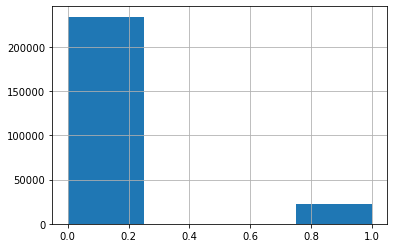

In [47]:
y_train.hist(bins=4)

In [48]:
# Imbalanced data

In [49]:
# На самом деле можно конечно ее пофиксить, но лучше посмотреть на метрики, а фиксить когда-нибудь потом :) 

In [50]:
from sklearn.metrics import precision_score

In [51]:
precision_score(y_test, model.predict(X_test))  # точность 42%

0.5152439024390244

In [52]:
from sklearn.metrics import recall_score

In [53]:
recall_score(y_test, model.predict(X_test))  # полнота 19%

0.09338736415546141

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(y_test, model.predict(X_test))  # крч модель так себе

0.1581163262123811

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test, model.predict(X_test))  # Ну крч это чуть лучше 50%, значит модель хотя бы чему-то научилась... 

0.5426188486589713

### Стеккинг, бэггинг и бустинг

бэггинг

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

In [ ]:
"""best_rfc = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid={
                           "criterion": ["gini", "entropy"],
                           "max_depth": range(3, 6), 
                           'min_samples_split' : range(2, 5),
                           "min_samples_leaf" : range(1, 5),
                           "class_weight": ["balanced", "None"],                     
                           }, 
                       verbose = 4)
    best_rfc.fit(X_train, y_train)
     
     
    GridSearch ~ 1 час будет перебирать
""" 

In [66]:
RFC = RandomForestClassifier(verbose=4).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.9s finished


In [67]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, RFC.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58530
           1       0.32      0.13      0.18      5429

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.57     63959
weighted avg       0.87      0.90      0.88     63959



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [74]:
RFC.feature_importances_

array([0.00896389, 0.00900544, 0.00537327, 0.00541978, 0.0154651 ,
       0.01442393, 0.0112083 , 0.01722425, 0.00950825, 0.00937549,
       0.00159285, 0.00165064, 0.00224411, 0.00304857, 0.00394324,
       0.0047651 , 0.00694929, 0.00877286, 0.01045618, 0.01145075,
       0.01321238, 0.01264567, 0.01731501, 0.00418889, 0.00246042,
       0.00800239, 0.00728711, 0.00578125, 0.01300469, 0.01109275,
       0.00386519, 0.01406814, 0.00085053, 0.01364447, 0.01386112,
       0.00550757, 0.01344578, 0.01001883, 0.01273658, 0.00821658,
       0.01214619, 0.01189981, 0.0073578 , 0.00699256, 0.00757706,
       0.0081734 , 0.33822123, 0.07766756, 0.06747704, 0.1104407 ])

In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)

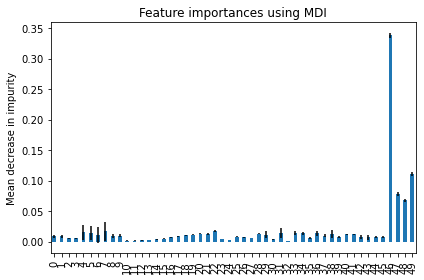

In [81]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [82]:
RFC.feature_importances_.shape

(50,)

In [85]:
RFC.feature_importances_[46]

0.3382212283564835

In [91]:
X[0]

array([ 0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,
        0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,  0. ,
        0. ,  1. , 16.6,  3. , 30. ,  5. ])

In [92]:
X[0][46]

16.6

In [93]:
df.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes


Т.к. перебирать параметры долго, то еще 1 параметр, который должен повлиять на наш результат - class_weight

In [95]:
RFC2 = RandomForestClassifier(class_weight="balanced" ,verbose=4).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.2s finished


In [97]:
print(classification_report(y_test, RFC.predict(X_test)))  # было

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58530
           1       0.32      0.13      0.18      5429

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.57     63959
weighted avg       0.87      0.90      0.88     63959



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [98]:
print(classification_report(y_test, RFC2.predict(X_test)))  # стало

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     58530
           1       0.30      0.12      0.17      5429

    accuracy                           0.90     63959
   macro avg       0.61      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


Круто, стало только хуже :) 

In [99]:
RFC3 = RandomForestClassifier(class_weight="balanced_subsample" ,verbose=4).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.3s finished


In [100]:
print(classification_report(y_test, RFC3.predict(X_test)))  # стало

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     58530
           1       0.31      0.13      0.18      5429

    accuracy                           0.90     63959
   macro avg       0.61      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


???????????

In [102]:
from sklearn.utils.class_weight import compute_class_weight

In [108]:
a = compute_class_weight(class_weight="balanced", classes=y_train.unique(), y=y_train)
a

array([0.54691054, 5.82929275])

In [117]:
y_train.unique()

array([0, 1], dtype=int64)

In [118]:
RFC4 = RandomForestClassifier(class_weight={0:1, 1:1000} ,verbose=4).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.8s finished


In [119]:
print(classification_report(y_test, RFC4.predict(X_test)))  # стало

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     58530
           1       0.29      0.13      0.18      5429

    accuracy                           0.90     63959
   macro avg       0.61      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [120]:
RFC4.class_weight

{0: 1, 1: 1000}

Ладно, ай донт андерстэнд

#### Бустинг

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
BoostCl = GradientBoostingClassifier(verbose=4).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5690           53.56s
         2           0.5579           54.07s
         3           0.5493           53.53s
         4           0.5421           53.46s
         5           0.5360           53.04s
         6           0.5303           52.65s
         7           0.5256           51.98s
         8           0.5216           51.32s
         9           0.5172           50.87s
        10           0.5141           50.53s
        11           0.5108           49.99s
        12           0.5063           49.40s
        13           0.5044           48.81s
        14           0.5021           48.34s
        15           0.4996           47.73s
        16           0.4974           47.18s
        17           0.4953           46.60s
        18           0.4934           46.12s
        19           0.4912           45.53s
        20           0.4890           44.93s
        21           0.4876           44.37s
        2

In [128]:
print(classification_report(y_test, BoostCl.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58530
           1       0.54      0.10      0.16      5429

    accuracy                           0.92     63959
   macro avg       0.73      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



In [132]:
BoostCl.feature_importances_

array([5.84482600e-03, 2.23397675e-02, 3.72983063e-04, 4.29991590e-05,
       5.30978450e-02, 8.49718827e-02, 3.36281671e-02, 1.28798963e-01,
       4.02514116e-02, 2.87882013e-02, 4.75724525e-03, 4.36576021e-03,
       4.79064193e-03, 6.69672661e-03, 4.16471693e-03, 1.69677248e-03,
       0.00000000e+00, 4.32098128e-04, 4.73113995e-03, 1.43062987e-02,
       4.66470216e-02, 4.49542175e-02, 8.86166285e-02, 3.39112475e-04,
       4.78616259e-05, 6.79060544e-04, 5.43590184e-04, 0.00000000e+00,
       1.04961936e-02, 5.84657330e-04, 0.00000000e+00, 1.02166137e-01,
       0.00000000e+00, 0.00000000e+00, 1.27948812e-04, 1.74558784e-02,
       5.99431255e-02, 1.69874724e-02, 6.95020741e-02, 1.86088160e-02,
       1.23422854e-03, 2.42625609e-03, 1.70099661e-02, 2.30634893e-02,
       5.64469541e-03, 4.95188722e-03, 4.10986568e-03, 1.61644640e-02,
       9.48959196e-04, 2.66794654e-03])